In [1]:
!pip install -r requirements.txt

You should consider upgrading via the 'C:\Users\nicol\Documents\mIA-x\TFM\Backtest\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import investpy
import time
import pandas as pd
import numpy as np
import quantstats as qs
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
etfs = investpy.get_etfs(country='united states')

In [4]:
etf_tickers = ["XLB", # Materials. 1998-12-22
               "XLE", # Energy. 1998-12-22
               "XLF", # Financial. 1998-12-22
               "XLI", # Industrial. 1998-12-22
               "XLK", # Technology. 1998-12-22
               "XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
               "XLU", # Utilities. 1998-12-22
               "XLV", # Health Care. 1998-12-22
               "XLY", # Consumer Discretionary. 1998-12-22
               "GLD", # Oro. 2004-11-18 *******************************
               "SHV", # Short Treasury Bond. 2007-01-11 ***************
               "SHY", # 1-3 Year Treasury Bond. 2002-07-30
               "IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
               "IEF", # 7-10 Year Treasury Bond. 2002-07-30
               "TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
               "TLT", # +20 Year Treasury Bond. 2002-07-30
               "TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
               "ICF", # Inmobiliario. 2001-02-02
               "IYZ", # Telecomunicaciones. 2000-05-22
               'HYG' # High Yield. 2007
               ]



In [131]:
etf_highYield = ['HYG', 'PHB', 'JNK', 'BKLN']

In [133]:
datayf_hy = yf.download(# tickers list or string as well
        tickers = etf_highYield,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None)



[*********************100%***********************]  4 of 4 completed


In [134]:
closeyf_hy = datayf_hy.xs('Close',level=1,axis=1)
#closeyf.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

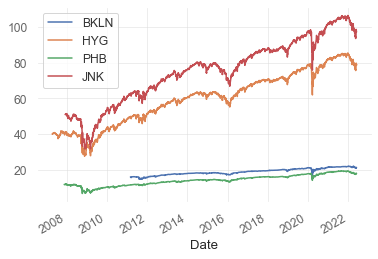

In [135]:
closeyf_hy.plot()

HYG es el que tiene más histórico y encaja mejor por fechas

In [136]:
closeyf_hy.loc[:,'HYG']

Date
2007-04-11    40.048347
2007-04-12    40.075233
2007-04-13    40.002296
2007-04-16    39.986973
2007-04-17    39.967777
                ...    
2022-05-27    79.880341
2022-05-31    79.193001
2022-06-01    78.900002
2022-06-02    79.230003
2022-06-03    78.639999
Name: HYG, Length: 3816, dtype: float64

In [5]:
datayf = yf.download(# tickers list or string as well
        tickers = etf_tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None)



[*********************100%***********************]  20 of 20 completed


In [7]:
closeyf = datayf.xs('Close',level=1,axis=1)
#closeyf.plot(figsize=(20,10))

In [8]:
closeyf.to_csv('datosCierre.csv')

In [9]:
max_first_valid_index = pd.Timestamp('1900-01-01')
for col_name in closeyf.columns.sort_values():
  data = closeyf[col_name]

  if max_first_valid_index < data.first_valid_index():
    max_first_valid_index = data.first_valid_index()

  print(f"{col_name} --> desde {data.first_valid_index()} hasta {data.last_valid_index()} --> {etfs[(etfs.symbol == col_name) & (etfs.country == 'united states')].name.iloc[0]}")

# Descartamos algún dato, para empezar todo desde el mismo punto
closeyf = closeyf.loc[max_first_valid_index:,]
#closeyf.plot(figsize=(20,10))

GLD --> desde 2004-11-18 00:00:00 hasta 2022-06-06 00:00:00 --> SPDR Gold Shares
HYG --> desde 2007-04-11 00:00:00 hasta 2022-06-06 00:00:00 --> iShares iBoxx $ High Yield Corporate Bond
ICF --> desde 2001-02-02 00:00:00 hasta 2022-06-06 00:00:00 --> iShares Cohen & Steers REIT
IEF --> desde 2002-07-30 00:00:00 hasta 2022-06-06 00:00:00 --> iShares 7-10 Year Treasury Bond
IEI --> desde 2007-01-11 00:00:00 hasta 2022-06-06 00:00:00 --> iShares 3-7 Year Treasury Bond
IYZ --> desde 2000-05-26 00:00:00 hasta 2022-06-06 00:00:00 --> iShares US Telecommunications
SHV --> desde 2007-01-11 00:00:00 hasta 2022-06-06 00:00:00 --> iShares Short Treasury Bond
SHY --> desde 2002-07-30 00:00:00 hasta 2022-06-06 00:00:00 --> iShares 1-3 Year Treasury Bond
TIP --> desde 2003-12-05 00:00:00 hasta 2022-06-06 00:00:00 --> iShares TIPS Bond
TLH --> desde 2007-01-11 00:00:00 hasta 2022-06-06 00:00:00 --> iShares 10-20 Year Treasury Bond
TLT --> desde 2002-07-30 00:00:00 hasta 2022-06-06 00:00:00 --> iShare

<AxesSubplot:xlabel='Date'>

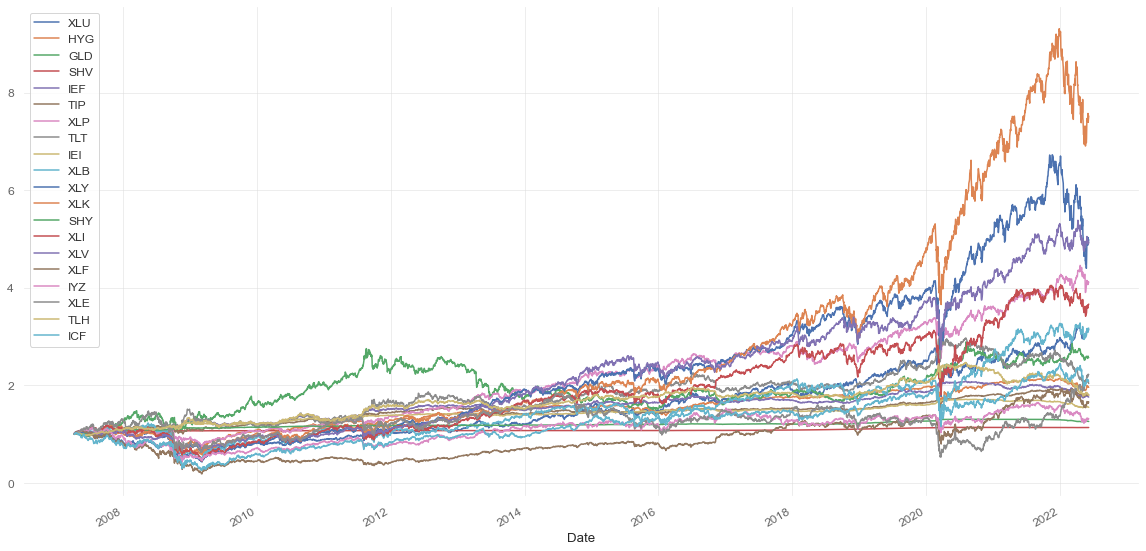

In [10]:
(closeyf/closeyf.iloc[0,]).plot(figsize=(20,10))

In [11]:
# Se calcula en un nuevo DF los retornos logaritmicos
logReturns = pd.DataFrame()
for column in closeyf.columns:
  logReturns[column] = np.log(closeyf[column]/closeyf[column].shift(1)).iloc[1:]

logReturns

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,-0.004410,0.000670,-0.001343,0.000275,0.000970,0.000000,0.001112,0.000230,-0.000199,0.008804,0.006971,0.010529,-0.000125,0.011993,0.011231,-0.001687,0.006683,0.015189,0.001002,-0.007489
2007-04-13,-0.000245,-0.001821,0.012609,0.000184,-0.001699,-0.002498,0.003328,-0.003095,-0.001097,0.002317,0.000771,0.000837,-0.000499,-0.000278,0.014500,0.004211,0.004430,0.000476,-0.002105,0.014442
2007-04-16,0.005877,-0.000384,0.008221,0.000183,0.001092,0.003197,0.002212,0.005494,0.000698,0.013286,0.009976,0.008337,-0.000126,0.008010,0.009551,0.024078,0.009741,0.005851,0.003506,-0.002602
2007-04-17,0.004628,-0.000480,-0.005865,0.000091,0.004237,0.000598,0.009166,0.005578,0.003186,-0.009435,0.004064,0.002073,0.001623,0.000000,0.003071,-0.000274,-0.001251,-0.005693,0.004390,0.014178
2007-04-18,0.007264,0.000288,0.005573,0.000641,0.002293,0.003284,-0.002558,0.004983,0.001490,-0.005395,-0.000761,-0.002489,0.001372,0.002747,-0.000279,0.011422,0.002502,-0.003495,0.003082,-0.005819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.013895,-0.008642,-0.009942,-0.000272,-0.010494,-0.007121,-0.007092,-0.021389,-0.004974,-0.015341,0.005060,-0.007166,-0.001559,-0.008098,-0.013446,-0.002815,-0.007655,-0.015137,-0.018339,-0.013112
2022-06-01,-0.001616,-0.003707,0.006349,-0.000118,-0.005646,-0.004117,-0.013111,-0.001144,-0.004494,-0.010047,-0.010473,-0.002995,-0.001863,-0.006143,-0.014473,-0.016200,-0.005504,0.016153,-0.002029,-0.008631
2022-06-02,0.006715,0.004174,0.012234,0.000000,0.001461,0.004601,0.014453,0.000516,0.000919,0.027218,0.030143,0.023921,0.000241,0.018944,0.007872,0.013660,0.009520,-0.003165,0.001068,0.013836


In [12]:
closeyf.iloc[0:,:]

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-11,23.870914,40.048374,67.080002,97.161041,58.035992,65.258141,18.079159,56.170341,77.098824,27.625568,31.341776,18.941729,65.979874,26.281363,26.538860,21.357565,20.751234,40.212616,67.082260,30.991600
2007-04-12,23.765881,40.075226,66.989998,97.187767,58.092335,65.258141,18.099272,56.183243,77.083458,27.869848,31.561016,19.142218,65.971642,26.598452,26.838598,21.321573,20.890373,40.828053,67.149506,30.760365
2007-04-13,23.760048,40.002319,67.839996,97.205605,57.993744,65.095337,18.159599,56.009624,76.998909,27.934504,31.585373,19.158255,65.938721,26.591070,27.230581,21.411543,20.983133,40.847504,67.008316,31.207819
2007-04-16,23.900091,39.986965,68.400002,97.223358,58.057114,65.303764,18.199816,56.318203,77.052673,28.308121,31.902050,19.318642,65.930428,26.804928,27.491894,21.933342,21.188519,41.087212,67.243675,31.126734
2007-04-17,24.010950,39.967781,68.000000,97.232246,58.303619,65.342819,18.367409,56.633217,77.298523,28.042278,32.031952,19.358740,66.037491,26.804928,27.576445,21.927340,21.162020,40.853985,67.539543,31.571186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,74.330002,79.193001,171.139999,110.182999,103.191002,117.572998,74.470001,116.352997,120.219002,86.029999,154.539993,140.449997,83.284996,94.699997,132.229996,35.470001,27.330000,87.199997,121.887001,65.160004
2022-06-01,74.209999,78.900002,172.229996,110.169998,102.610001,117.089996,73.500000,116.220001,119.680000,85.169998,152.929993,140.029999,83.129997,94.120003,130.330002,34.900002,27.180000,88.620003,121.639999,64.599998
2022-06-02,74.709999,79.230003,174.350006,110.169998,102.760002,117.629997,74.570000,116.279999,119.790001,87.519997,157.610001,143.419998,83.150002,95.919998,131.360001,35.380001,27.440001,88.339996,121.769997,65.500000


In [13]:
closeyf = closeyf.iloc[1:,:]

Voy a generar un índice sintético:
https://medium.com/python-financial-analysis/python-financial-analysis-4-2-custom-market-index-ef7873926034


Tengo que evitar el índice esté basado en el precio. Si se basa en precio, sólo por cotización unos ETFs pesar´na más que otros y el índice tendrá un sesgo. Esto es así si los pongo en base 1 y equipondero?

In [14]:
closeyf.head(3)

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,23.765881,40.075226,66.989998,97.187767,58.092335,65.258141,18.099272,56.183243,77.083458,27.869848,31.561016,19.142218,65.971642,26.598452,26.838598,21.321573,20.890373,40.828053,67.149506,30.760365
2007-04-13,23.760048,40.002319,67.839996,97.205605,57.993744,65.095337,18.159599,56.009624,76.998909,27.934504,31.585373,19.158255,65.938721,26.591070,27.230581,21.411543,20.983133,40.847504,67.008316,31.207819
2007-04-16,23.900091,39.986965,68.400002,97.223358,58.057114,65.303764,18.199816,56.318203,77.052673,28.308121,31.902050,19.318642,65.930428,26.804928,27.491894,21.933342,21.188519,41.087212,67.243675,31.126734


In [15]:
precio_cero = (closeyf/closeyf.iloc[0,])
precio_cero.head()

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-13,0.999755,0.998181,1.012688,1.000184,0.998303,0.997505,1.003333,0.996910,0.998903,1.002320,1.000772,1.000838,0.999501,0.999722,1.014605,1.004220,1.004440,1.000476,0.997897,1.014546
2007-04-16,1.005647,0.997798,1.021048,1.000366,0.999394,1.000699,1.005555,1.002402,0.999601,1.015726,1.010806,1.009216,0.999375,1.007763,1.024342,1.028692,1.014272,1.006348,1.001402,1.011910
2007-04-17,1.010312,0.997319,1.015077,1.000458,1.003637,1.001298,1.014815,1.008009,1.002790,1.006187,1.014921,1.011311,1.000998,1.007763,1.027492,1.028411,1.013003,1.000635,1.005808,1.026359
2007-04-18,1.017677,0.997606,1.020749,1.001099,1.005941,1.004591,1.012222,1.013044,1.004286,1.000773,1.014150,1.008797,1.002373,1.010535,1.027205,1.040225,1.015541,0.997144,1.008913,1.020404


Calculo el peso de cada ETF

In [16]:
peso = 1/precio_cero.shape[1]
peso

0.05

In [17]:
ew_index_base_cero = np.sum(precio_cero*peso, axis=1)

In [18]:
ew_index_base_cero

Date
2007-04-12    1.000000
2007-04-13    1.002255
2007-04-16    1.008118
2007-04-17    1.009830
2007-04-18    1.011164
                ...   
2022-05-31    2.711326
2022-06-01    2.696508
2022-06-02    2.731945
2022-06-03    2.703213
2022-06-06    2.719869
Length: 3816, dtype: float64

<AxesSubplot:xlabel='Date'>

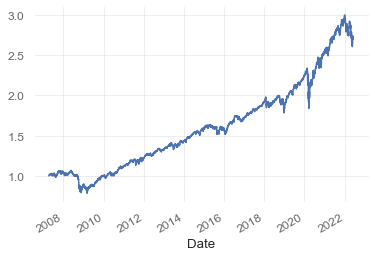

In [19]:
ew_index_base_cero.plot()

Me permite este índice identificar cuáles son los sectores que suben o bajan? Veo dos cosas. La primera es que se identifica la correción del covid (y tiene sentido), o sea que parece que está bien calculado. Lo segundo es que tiene tendencia alcista, porque cuando uno o varios sectores caen, entiendo que el resto tira, pero no veo como sacar info de aquí

Y si hago un índice que vaya teniendo en cuenta los X sectores que más tiran por periodo? Se me ocurre que puedo hacer varios índices y sacar features de cada uno...
En primer lugar, cómo de estables es esa relación de TOP por periodos?

In [20]:
def seleccion_top_X(data, periodo, X):
    '''
       Devuelve df con los activos ordenados por volatildad
       cada día. El índice son fechas, las columnas el orden
       y los valores del DF son los ticker de los activos.

    '''
    data = data.resample(periodo).last()
    # Primero verifico que el df de datos está completo
    rent_activos = np.log(data).diff()
    rent_activos.iloc[0,:] = 0


    ranking = []
    for fila in range(rent_activos.shape[0]):
        ranking.append(rent_activos.iloc[fila, :X].sort_values(ascending=True).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=rent_activos.index)
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Esto es un ranking por rentabilidad

In [22]:
ranking = seleccion_top_X(closeyf,'2M', 5)
ranking

,0,1,2,3,4
Date,,,,,
2007-04-30,XLU,HYG,GLD,SHV,IEF
2007-06-30,XLU,GLD,HYG,IEF,SHV
2007-08-31,XLU,SHV,HYG,GLD,IEF
2007-10-31,SHV,IEF,HYG,XLU,GLD
2007-12-31,HYG,XLU,SHV,IEF,GLD
...,...,...,...,...,...
2021-10-31,IEF,GLD,XLU,HYG,SHV
2021-12-31,SHV,IEF,HYG,GLD,XLU
2022-02-28,XLU,HYG,IEF,SHV,GLD


Con esta idea, puedo aplicar distintos ratios (sharpe, jensen, rentabilida_máxima..) y buscar carteras. Estos activos, tendrían etiqueta 1 y el resto 0 en ese periodo.

Ahora tengo un problema. Con estos filtros, en el mismo periodo voy a tener distintas carteras TOP5 y la red no sabrá qué aprender. De momento voy calcular algunos.


Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [23]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [24]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de tading)
beta.head()

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,1.833424,0.069863,1.226701,0.001106,0.211412,0.207306,0.944901,0.441845,0.093618,2.003610,1.526539,1.313495,0.016812,1.277764,1.068844,1.595625,1.589656,1.959659,0.280753,2.226656
2007-06-11,1.836907,0.077228,1.188404,0.001216,0.217355,0.216021,0.939597,0.452167,0.096781,2.015201,1.535707,1.323156,0.018633,1.291737,1.032448,1.594317,1.592893,1.973436,0.287901,2.197824
2007-06-12,1.836235,0.145579,1.114982,0.002743,0.274911,0.247878,0.976714,0.544316,0.136079,1.909369,1.433193,1.330834,0.031628,1.325304,0.966529,1.462847,1.598635,1.962935,0.371598,2.219884
2007-06-13,1.853121,0.149680,1.086196,-0.002167,0.279581,0.267132,0.928402,0.626536,0.135934,1.976132,1.389313,1.305994,0.026872,1.439036,0.940716,1.511187,1.497055,1.956339,0.422760,2.088205
2007-06-14,1.849272,0.150504,1.074358,-0.000785,0.276005,0.263021,0.928116,0.606352,0.131658,1.991040,1.403265,1.329034,0.024535,1.435763,0.942258,1.472020,1.501699,1.999529,0.410272,2.081514


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [25]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [26]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,-0.002590,-0.003056,-0.022584,0.000177,0.000745,0.000733,0.000822,-0.003183,-0.000498,0.008343,0.004652,0.006928,0.000286,0.007016,-0.002328,0.003139,0.007808,-0.006284,-0.000871,-0.001877
2007-06-11,0.013166,-0.002114,0.007456,0.000092,-0.002615,-0.002140,0.005455,-0.002866,0.000204,-0.008685,-0.003291,0.001982,0.000126,0.001303,0.000287,0.004570,-0.001748,0.007643,-0.002690,-0.017291
2007-06-12,0.001417,-0.003695,0.001542,0.000118,-0.004458,-0.003833,0.000051,-0.009285,-0.002936,0.006286,0.005780,0.001075,-0.000570,-0.000096,0.002136,0.000514,0.001670,0.006768,-0.007638,0.004220
2007-06-13,0.000698,0.000203,-0.004468,-0.000161,0.000390,0.000949,-0.001885,0.005396,0.000230,0.002944,-0.002785,-0.000737,-0.000025,0.008765,-0.001547,0.003285,-0.006478,-0.000315,0.003386,-0.009147
2007-06-14,0.000344,0.000292,-0.002342,0.000735,-0.000630,-0.000225,-0.001509,-0.004456,-0.000825,0.001278,0.002603,0.005163,-0.000078,0.000522,-0.000222,-0.006292,0.002270,0.010308,-0.002870,-0.006638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.008120,-0.004144,-0.009007,-0.000244,-0.010105,-0.005796,0.001440,-0.020323,-0.004747,-0.004218,0.023108,0.009603,-0.001429,0.002256,-0.004568,0.008126,0.003415,-0.002626,-0.017504,-0.002830
2022-06-01,0.002010,-0.000950,0.006870,-0.000099,-0.005388,-0.003282,-0.007762,-0.000469,-0.004343,-0.003120,0.000601,0.007290,-0.001778,0.000291,-0.008880,-0.009349,0.001306,0.023877,-0.001499,-0.002227
2022-06-02,-0.002080,-0.002153,0.010689,-0.000040,0.001015,0.002621,0.001468,-0.000754,0.000665,0.010324,0.003610,-0.000529,0.000074,0.003548,-0.005505,-0.002707,-0.006525,-0.020509,0.000052,-0.001665


Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [27]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [28]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,-0.316995,-3.957195,17.852942,13.138204,-6.355420,-9.882395,5.578973,-5.188228,-7.109986,2.330327,0.850368,0.920933,-9.384898,-0.308733,20.427941,3.229003,5.053443,0.377376,-5.331937,10.874139
2007-04-16,7.589688,-0.834307,11.640249,13.073996,4.086216,12.647395,3.708852,9.210173,4.522115,13.361287,10.996820,9.168141,-2.364907,8.910194,13.455419,18.463876,11.110071,4.635930,8.881966,-1.958936
2007-04-17,5.976564,-1.042868,-8.304642,6.544529,15.852906,2.365362,15.368076,9.350343,20.638270,-9.488797,4.479388,2.280223,30.507731,0.000000,4.326293,-0.209888,-1.427355,-4.510227,11.121439,10.675459
2007-04-18,9.380769,0.625076,7.890478,45.912848,8.578446,12.991409,-4.289272,8.352510,9.654796,-5.425670,-0.838508,-2.736879,25.799322,3.055761,-0.393150,8.759155,2.853337,-2.769038,7.806266,-4.381588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-17.944636,-18.780563,-14.077579,-19.478783,-39.266175,-28.173142,-11.889819,-35.855575,-32.226653,-15.428274,5.577710,-7.880005,-29.304245,-9.007873,-18.943993,-2.158873,-8.730786,-11.993219,-46.455541,-9.872809
2022-06-01,-2.086717,-8.055384,8.989521,-8.447410,-21.126055,-16.286401,-21.981504,-1.917196,-29.112241,-10.103673,-11.544147,-3.293482,-35.024628,-6.833540,-20.390634,-12.423186,-6.277402,12.798304,-5.138675,-6.499219
2022-06-02,8.672301,9.070569,17.322570,0.000000,5.465708,18.203950,24.231300,0.865165,5.951924,27.372083,33.227410,26.305914,4.523976,21.072114,11.090505,10.474957,10.859008,-2.507347,2.705790,10.417899


Por curiosidad hago un resample de 2 meses

In [29]:
test_sharpe =calcula_sharpe(closeyf, 252).resample('2M').last()
test_sharpe.head()

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,-4.951500,0.205975,-9.884776,13.062509,16.211565,21.135760,-6.108037,17.466877,19.261443,-18.576256,-14.068049,-8.523255,14.034135,-13.079075,-4.673521,-5.985406,-5.727867,-9.445417,13.586866,-5.903024
2007-06-30,10.155650,-6.182609,0.220206,19.610185,19.432750,23.250969,1.860176,17.210335,20.850235,6.227081,1.402273,-3.859435,37.569440,3.996201,-3.984679,-4.227803,-3.041239,2.761167,21.055026,-5.223785
2007-08-31,-2.673973,19.539971,15.409191,-13.014188,0.892646,-1.562550,4.368468,1.320613,-1.896746,9.031219,17.909486,7.203036,0.000000,16.774076,6.568932,10.063189,8.623817,10.392596,-1.997801,16.099977
2007-10-31,14.994382,13.644768,23.059300,-6.510235,-25.164593,-18.814390,10.656411,-15.207386,-22.638079,26.249015,3.313885,12.853094,-30.015345,9.641599,8.634357,10.299702,9.562470,21.039865,-5.672959,11.861888
2007-12-31,-17.876249,4.751232,-9.242202,-13.067049,17.243019,25.887352,-13.335496,10.119366,19.677609,-6.010734,-4.037950,-8.219406,29.749227,-5.101527,-5.177480,-0.264851,-12.680146,-10.120019,13.786865,6.785614


Cojo el top5 del primer periodo

In [33]:
test_sharpe.iloc[1, :].sort_values(ascending=False)

SHY    37.569440
TIP    23.250969
TLH    21.055026
IEI    20.850235
SHV    19.610185
IEF    19.432750
TLT    17.210335
XLU    10.155650
XLB     6.227081
XLI     3.996201
XLE     2.761167
XLP     1.860176
XLY     1.402273
GLD     0.220206
IYZ    -3.041239
XLK    -3.859435
XLV    -3.984679
XLF    -4.227803
ICF    -5.223785
HYG    -6.182609
Name: 2007-06-30 00:00:00, dtype: float64

Me parecen raros estos valores, voy a comprobar.

<AxesSubplot:xlabel='Date'>

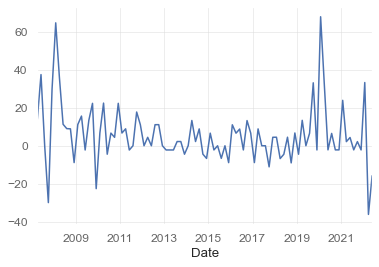

In [34]:
test_sharpe.loc[:, 'SHY'].plot()

C:\Users\nicol\Documents\mIA-x\TFM\Backtest\venv\lib\site-packages\pandas\core\indexes\base.py:6393: UserWarning: Parsing '31-12-2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  label = self._maybe_cast_slice_bound(label, side)


<AxesSubplot:xlabel='Date'>

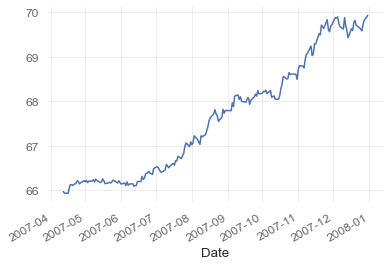

In [38]:
closeyf.loc[:'31-12-2007', 'SHY'].plot()

El cáclulo del ratio de sharpe está bien y viendo los datos tiene sentido...la varaición es muy baja con rentabilidad positiva. Quizá deberíamos contrastar los datos con otra fuente.

Comparo con la primera cartera que tenía por rentabilidad

In [31]:
ranking.iloc[1]

0    XLU
1    GLD
2    HYG
3    IEF
4    SHV
Name: 2007-06-30 00:00:00, dtype: object

Me hago una función que me ordene un df y me genere carteras seleccionando n_activos.

In [69]:
def seleccion_top_N(data, n_activos):
    ranking = []
    for fila in range(data.shape[0]):
        ranking.append(data.iloc[fila, :].sort_values(ascending=False).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=data.index)
    ranking_df = ranking_df.iloc[:, :5]
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Ahora voy a calcular ratios

Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [142]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [39]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de trading)
beta

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,1.833424,0.069863,1.226701,0.001106,0.211412,0.207306,0.944901,0.441845,0.093618,2.003610,1.526539,1.313495,0.016812,1.277764,1.068844,1.595625,1.589656,1.959659,0.280753,2.226656
2007-06-11,1.836907,0.077228,1.188404,0.001216,0.217355,0.216021,0.939597,0.452167,0.096781,2.015201,1.535707,1.323156,0.018633,1.291737,1.032448,1.594317,1.592893,1.973436,0.287901,2.197824
2007-06-12,1.836235,0.145579,1.114982,0.002743,0.274911,0.247878,0.976714,0.544316,0.136079,1.909369,1.433193,1.330834,0.031628,1.325304,0.966529,1.462847,1.598635,1.962935,0.371598,2.219884
2007-06-13,1.853121,0.149680,1.086196,-0.002167,0.279581,0.267132,0.928402,0.626536,0.135934,1.976132,1.389313,1.305994,0.026872,1.439036,0.940716,1.511187,1.497055,1.956339,0.422760,2.088205
2007-06-14,1.849272,0.150504,1.074358,-0.000785,0.276005,0.263021,0.928116,0.606352,0.131658,1.991040,1.403265,1.329034,0.024535,1.435763,0.942258,1.472020,1.501699,1.999529,0.410272,2.081514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,0.651949,0.507773,0.105645,0.003180,0.043930,0.149556,0.963175,0.120376,0.025606,1.255792,2.037564,1.893090,0.014672,1.168993,1.002322,1.235293,1.249739,1.412507,0.094184,1.160775
2022-06-01,0.661566,0.503071,0.095164,0.003376,0.047101,0.152246,0.976044,0.123133,0.027552,1.263918,2.020635,1.876706,0.015454,1.174157,1.020686,1.250297,1.242611,1.409460,0.096603,1.168690
2022-06-02,0.673622,0.484588,0.118322,0.003095,0.034140,0.151639,0.994514,0.097282,0.019425,1.293980,2.032209,1.872654,0.012746,1.179174,1.024560,1.253550,1.228981,1.328417,0.077812,1.187226


In [67]:
beta_resample = beta.resample('2M').last()
beta_resample

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,2.061719,0.192280,0.919122,-0.000549,0.309701,0.307583,0.816944,0.685709,0.161756,1.875752,1.197919,1.266883,0.047004,1.330189,1.016402,1.523488,1.385618,2.145661,0.469996,2.132023
2007-08-31,2.025003,0.548289,0.424857,-0.018875,-0.344902,-0.231757,1.066276,-0.362646,-0.290412,2.349716,1.996867,1.598839,-0.133383,1.873070,1.276159,2.381979,1.731013,2.301940,-0.350031,2.265592
2007-10-31,1.417361,0.706353,0.622371,-0.008628,-0.271344,-0.087192,0.793625,-0.347123,-0.109878,2.629563,1.890713,1.413611,-0.059572,1.824569,1.198918,2.350516,1.434179,2.519212,-0.161673,2.203484
2007-12-31,1.018028,0.076103,0.979893,-0.022732,-0.472929,-0.489381,0.963732,-0.613325,-0.380408,2.772771,1.767893,1.843927,-0.170018,1.847494,1.199303,2.939280,2.372548,2.937242,-0.534621,2.752553
2008-02-29,1.697211,0.087039,0.156445,-0.014496,-0.295055,-0.145159,1.026009,-0.250512,-0.205478,2.434304,2.146168,1.846306,-0.095780,1.825007,0.953562,3.265922,2.326278,2.603645,-0.261901,3.015800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.995047,0.319805,0.119177,0.001499,0.068492,0.090887,0.966253,0.244343,0.028259,1.577145,1.362984,1.761264,0.006644,1.504189,1.216597,1.611388,1.246921,1.429353,0.163766,1.174526
2021-12-31,0.842433,0.444539,0.253753,0.002993,-0.236453,0.094212,0.757433,-0.528266,-0.114620,1.303969,1.889119,2.094103,-0.018398,1.587557,0.713918,1.471707,0.960685,1.915871,-0.328955,1.373657
2022-02-28,0.801763,0.405951,-0.005829,0.004505,0.129441,0.153904,0.536451,0.129002,0.105174,1.274584,2.018544,2.099869,0.054821,1.211188,1.039041,1.135016,1.506409,0.379712,0.131504,1.264003


In [68]:
cartera_beta = seleccion_top_N(beta_resample, 5)
cartera_beta

,0,1,2,3,4
Date,,,,,
2007-06-30,XLE,ICF,XLU,XLB,XLF
2007-08-31,XLF,XLB,XLE,ICF,XLU
2007-10-31,XLB,XLE,XLF,ICF,XLY
2007-12-31,XLF,XLE,XLB,ICF,IYZ
2008-02-29,XLF,ICF,XLE,XLB,IYZ
...,...,...,...,...,...
2021-10-31,XLK,XLF,XLB,XLI,XLE
2021-12-31,XLK,XLE,XLY,XLI,XLF
2022-02-28,XLK,XLY,IYZ,XLB,ICF


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [144]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [42]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,-0.002590,-0.003056,-0.022584,0.000177,0.000745,0.000733,0.000822,-0.003183,-0.000498,0.008343,0.004652,0.006928,0.000286,0.007016,-0.002328,0.003139,0.007808,-0.006284,-0.000871,-0.001877
2007-06-11,0.013166,-0.002114,0.007456,0.000092,-0.002615,-0.002140,0.005455,-0.002866,0.000204,-0.008685,-0.003291,0.001982,0.000126,0.001303,0.000287,0.004570,-0.001748,0.007643,-0.002690,-0.017291
2007-06-12,0.001417,-0.003695,0.001542,0.000118,-0.004458,-0.003833,0.000051,-0.009285,-0.002936,0.006286,0.005780,0.001075,-0.000570,-0.000096,0.002136,0.000514,0.001670,0.006768,-0.007638,0.004220
2007-06-13,0.000698,0.000203,-0.004468,-0.000161,0.000390,0.000949,-0.001885,0.005396,0.000230,0.002944,-0.002785,-0.000737,-0.000025,0.008765,-0.001547,0.003285,-0.006478,-0.000315,0.003386,-0.009147
2007-06-14,0.000344,0.000292,-0.002342,0.000735,-0.000630,-0.000225,-0.001509,-0.004456,-0.000825,0.001278,0.002603,0.005163,-0.000078,0.000522,-0.000222,-0.006292,0.002270,0.010308,-0.002870,-0.006638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.008120,-0.004144,-0.009007,-0.000244,-0.010105,-0.005796,0.001440,-0.020323,-0.004747,-0.004218,0.023108,0.009603,-0.001429,0.002256,-0.004568,0.008126,0.003415,-0.002626,-0.017504,-0.002830
2022-06-01,0.002010,-0.000950,0.006870,-0.000099,-0.005388,-0.003282,-0.007762,-0.000469,-0.004343,-0.003120,0.000601,0.007290,-0.001778,0.000291,-0.008880,-0.009349,0.001306,0.023877,-0.001499,-0.002227
2022-06-02,-0.002080,-0.002153,0.010689,-0.000040,0.001015,0.002621,0.001468,-0.000754,0.000665,0.010324,0.003610,-0.000529,0.000074,0.003548,-0.005505,-0.002707,-0.006525,-0.020509,0.000052,-0.001665


In [52]:
alpha_resample = alpha.resample('2M').last()
alpha_resample

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.004302,-0.003177,-0.001432,2.748714e-04,0.004659,0.005346,-0.000302,0.009082,0.002939,0.002952,-0.000797,-0.005698,0.001917,0.001295,-0.004584,-0.008145,-0.005060,-0.000221,0.007500,-0.010620
2007-08-31,-0.014650,0.005585,0.008243,-6.453495e-05,0.002381,0.001045,-0.004018,0.003041,0.001511,-0.005616,0.003842,-0.003382,0.000829,0.003444,-0.003265,-0.001674,-0.003193,-0.001183,0.001386,0.007308
2007-10-31,0.001894,0.001436,0.012019,-3.179158e-05,-0.004865,-0.004158,0.000915,-0.006692,-0.002741,0.008075,-0.009955,0.001997,-0.001188,-0.003840,-0.002090,-0.002682,-0.001448,0.009285,-0.001131,0.000648
2007-12-31,-0.011573,0.002356,-0.004344,-2.331747e-04,0.003555,0.005453,-0.005807,0.004670,0.002190,0.000201,0.000276,-0.003366,0.001203,-0.000470,-0.001003,0.006204,-0.005831,-0.006228,0.004251,0.015145
2008-02-29,-0.012820,-0.002958,0.003548,3.568981e-05,0.007671,0.008997,-0.008684,0.012669,0.006243,-0.008293,-0.003673,-0.002017,0.002490,-0.009425,-0.004353,-0.000335,-0.008735,-0.007602,0.010298,0.008509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-0.005843,-0.002605,-0.008530,-1.808399e-04,0.000444,-0.002551,-0.000868,0.003080,-0.000152,-0.004619,0.002750,0.004489,0.000117,0.000465,0.009831,-0.003776,-0.007059,-0.006421,0.001035,-0.010605
2021-12-31,0.003397,-0.000284,0.006778,-3.628268e-07,-0.001101,-0.001249,0.006675,0.002023,-0.000297,0.004266,-0.002623,-0.005131,-0.000115,0.004069,-0.004336,-0.001969,-0.006779,0.002293,0.002199,0.003125
2022-02-28,0.003818,0.000035,0.010322,-9.834744e-05,0.011084,0.016951,-0.014296,0.021465,0.006185,-0.013591,0.003620,-0.005346,0.001683,0.005601,-0.009336,-0.016853,-0.009487,0.023743,0.019190,-0.020292


Calculo las carteras con alpha de jensen

In [53]:
cartera_alpha = seleccion_top_N(alpha_resample, 5)

Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [61]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [62]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe.head()

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,-0.316995,-3.957195,17.852942,13.138204,-6.355420,-9.882395,5.578973,-5.188228,-7.109986,2.330327,0.850368,0.920933,-9.384898,-0.308733,20.427941,3.229003,5.053443,0.377376,-5.331937,10.874139
2007-04-16,7.589688,-0.834307,11.640249,13.073996,4.086216,12.647395,3.708852,9.210173,4.522115,13.361287,10.996820,9.168141,-2.364907,8.910194,13.455419,18.463876,11.110071,4.635930,8.881966,-1.958936
2007-04-17,5.976564,-1.042868,-8.304642,6.544529,15.852906,2.365362,15.368076,9.350343,20.638270,-9.488797,4.479388,2.280223,30.507731,0.000000,4.326293,-0.209888,-1.427355,-4.510227,11.121439,10.675459
2007-04-18,9.380769,0.625076,7.890478,45.912848,8.578446,12.991409,-4.289272,8.352510,9.654796,-5.425670,-0.838508,-2.736879,25.799322,3.055761,-0.393150,8.759155,2.853337,-2.769038,7.806266,-4.381588


Por curiosidad hago un resample de 2 meses

In [63]:
sharpe_resample = calcula_sharpe(closeyf, 252).resample('2M').last()
sharpe_resample.head()

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,-4.951500,0.205975,-9.884776,13.062509,16.211565,21.135760,-6.108037,17.466877,19.261443,-18.576256,-14.068049,-8.523255,14.034135,-13.079075,-4.673521,-5.985406,-5.727867,-9.445417,13.586866,-5.903024
2007-06-30,10.155650,-6.182609,0.220206,19.610185,19.432750,23.250969,1.860176,17.210335,20.850235,6.227081,1.402273,-3.859435,37.569440,3.996201,-3.984679,-4.227803,-3.041239,2.761167,21.055026,-5.223785
2007-08-31,-2.673973,19.539971,15.409191,-13.014188,0.892646,-1.562550,4.368468,1.320613,-1.896746,9.031219,17.909486,7.203036,0.000000,16.774076,6.568932,10.063189,8.623817,10.392596,-1.997801,16.099977
2007-10-31,14.994382,13.644768,23.059300,-6.510235,-25.164593,-18.814390,10.656411,-15.207386,-22.638079,26.249015,3.313885,12.853094,-30.015345,9.641599,8.634357,10.299702,9.562470,21.039865,-5.672959,11.861888
2007-12-31,-17.876249,4.751232,-9.242202,-13.067049,17.243019,25.887352,-13.335496,10.119366,19.677609,-6.010734,-4.037950,-8.219406,29.749227,-5.101527,-5.177480,-0.264851,-12.680146,-10.120019,13.786865,6.785614


Tengo que eliminar la primera fila para que me cuadren las fechas

In [64]:
sharpe_resample = sharpe_resample.iloc[1:, :]
sharpe_resample

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,10.155650,-6.182609,0.220206,19.610185,19.432750,23.250969,1.860176,17.210335,20.850235,6.227081,1.402273,-3.859435,37.569440,3.996201,-3.984679,-4.227803,-3.041239,2.761167,21.055026,-5.223785
2007-08-31,-2.673973,19.539971,15.409191,-13.014188,0.892646,-1.562550,4.368468,1.320613,-1.896746,9.031219,17.909486,7.203036,0.000000,16.774076,6.568932,10.063189,8.623817,10.392596,-1.997801,16.099977
2007-10-31,14.994382,13.644768,23.059300,-6.510235,-25.164593,-18.814390,10.656411,-15.207386,-22.638079,26.249015,3.313885,12.853094,-30.015345,9.641599,8.634357,10.299702,9.562470,21.039865,-5.672959,11.861888
2007-12-31,-17.876249,4.751232,-9.242202,-13.067049,17.243019,25.887352,-13.335496,10.119366,19.677609,-6.010734,-4.037950,-8.219406,29.749227,-5.101527,-5.177480,-0.264851,-12.680146,-10.120019,13.786865,6.785614
2008-02-29,-38.564498,-8.328039,2.799923,12.975016,39.785414,41.362305,-31.830680,25.453524,53.813681,-32.920153,-27.802565,-22.604878,64.890023,-30.866421,-19.621422,-25.402803,-36.604618,-26.735636,32.748401,-16.393297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-7.697585,-5.742619,-12.098147,-12.959029,1.632032,-10.134298,-1.646456,5.115484,-1.004366,-4.832269,2.853268,4.707738,2.189420,0.319377,13.647265,-3.041497,-8.219956,-5.221545,2.571799,-8.089667
2021-12-31,4.518561,-0.499509,9.640173,0.000000,-4.227077,-4.897020,11.344510,3.283659,-2.013894,4.449323,-2.638820,-5.363095,-2.196755,4.740712,-5.987217,-1.373425,-7.599487,2.001103,5.468447,2.478371
2022-02-28,6.671388,1.559109,14.601083,-6.498534,42.286220,68.086882,-22.456932,36.345858,41.212969,-11.512550,7.730744,-1.996840,33.377845,8.495526,-10.691536,-11.460305,-7.932679,19.317169,49.172168,-13.679414


Calulo el top_5

In [66]:
cartera_sharpe = seleccion_top_N(sharpe_resample, 5)
cartera_sharpe

,0,1,2,3,4
Date,,,,,
2007-06-30,SHY,TIP,TLH,IEI,SHV
2007-08-31,HYG,XLY,XLI,ICF,GLD
2007-10-31,XLB,GLD,XLE,XLU,HYG
2007-12-31,SHY,TIP,IEI,IEF,TLH
2008-02-29,SHY,IEI,TIP,IEF,TLH
...,...,...,...,...,...
2021-10-31,XLV,TLT,XLK,XLY,TLH
2021-12-31,XLP,GLD,TLH,XLI,XLU
2022-02-28,TIP,TLH,IEF,IEI,TLT


Comparo con la primera cartera que tenía por rentabilidad

In [158]:
ranking.iloc[1]

0    XLP
1    SHV
2    SHY
3    TLT
4    TIP
Name: 2007-03-31 00:00:00, dtype: object

Idea. Puedo construir carteras y asigna peso a cada ETF por cada cartera en la que aparezac. Puedo equiponderar y asignar peso/num_carteras

Cuántas carteras hago?
- Jensen
- Sharpe
- Beta
- Momentum
- Media_Movil_Close>Indice equiponderado--> Selecciono los 5 que más se separen porcentualmente de la media.

Qué etiquetas tiene la red?

Momentum

In [70]:

from pandas import Timestamp

def calculate_momentum(data):
    '''Esta función calcula el momentum para un sólo activo.
    En caso de querer aplicarla a un DF, los datos
    deben ser introducidos en bucle for o usada en
    en apply()
    '''
    # Calculo el log de los datos para transformar el dataset. Son precios de cierre en escala log
    # Con esto convierto el problema de la regresión exponencial en lineal.
    # REcuerda que usamos reg exponencial porque viene epresada en %, mientras que la reg lineal, lo están en $
    log_data = np.log(data)

    # Horizontal values
    # Piensa que esto es
    x_data = np.arange(len(log_data))

    # De la regresión, sólo me interesan la pendiente y la precisión:
    beta, _, rvalue, _, _ = linregress(x_data, log_data)

    # Anualizamos la pendiente. Esto tengo que valorarlo en función de cómo quiero que
    # evolucione mi algoritmo. Creo que no me interesa anualizar y trabajar en ventana rodante
    # Si no anualizamos, calcularemos el porcentaje de movimiento por día.
    # Y multiplicamos por la precisión del modelo
    # Al mulitplicar por r2, está filtrando acciones con momentum alto pero mal ajustados
    # R2 = 1 - RSS/TSS
    return  (1+beta)**252*(rvalue**2)

Ahora tengo que calcular el momentum de cada ETF.

In [76]:
def filtro_momentum(data, periodo_momentum, resampling='2M'):
    """Este filtro se basa en una condición de momento positvo
    en ventana rodante.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data, periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo momentum
    momentum = pd.DataFrame(columns = data.columns)

    for stock in data.columns:
        # Voy a recorrer la lista de acciones para calcular su ventana rodante
        # y sobre ese dato, calculo el momento usando apply. PIensa que lo que estás haciend
        # es calcular la regresión exponencial cada X días
        momentum[stock] = data[stock].rolling(periodo_momentum).apply(calculate_momentum, raw=False)

    momentum = momentum.resample('{}'.format(resampling)).last()

    return momentum

In [79]:
momentum = filtro_momentum(closeyf, 252, '2M').dropna(axis=0)
momentum

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,0.001796,0.005881,1.422601,1.044139,1.110707,1.121585,0.301539,1.005308,1.109102,0.169783,0.644783,0.264057,1.072447,0.150747,0.404696,0.581926,0.529020,0.595733,1.053578,0.379495
2008-06-30,0.065982,0.047359,1.151672,0.999096,0.908176,1.029274,0.218392,0.713293,0.899662,0.369920,0.571883,0.308673,0.929558,0.277749,0.495135,0.561821,0.505068,0.725510,0.815253,0.120756
2008-08-31,0.082288,0.259057,0.524573,0.959990,0.672063,0.874478,0.019644,0.421460,0.664669,0.017157,0.534127,0.409693,0.774221,0.456221,0.498762,0.521219,0.487211,0.218193,0.566427,0.151197
2008-10-31,0.383555,0.318000,0.015351,0.964617,0.485443,0.043124,0.137019,0.382262,0.567254,0.209571,0.374532,0.386536,0.739394,0.367633,0.466259,0.454955,0.397418,0.128358,0.347623,0.150298
2008-12-31,0.444888,0.426783,0.393967,0.986053,0.457109,0.259367,0.337984,0.512775,0.584560,0.317273,0.384574,0.381919,0.740126,0.388247,0.475475,0.343999,0.384330,0.296376,0.391586,0.255650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.645001,0.908268,0.178921,0.757130,0.182219,0.847209,0.861668,0.084541,0.318899,0.893675,1.028997,1.206444,0.174120,0.954980,1.112250,1.293394,0.832395,1.036176,0.124575,1.319679
2021-12-31,0.805274,0.792512,0.013043,0.864793,0.000399,0.915263,0.927121,0.190744,0.328007,0.757973,1.018417,1.234905,0.558055,0.721851,1.037634,1.040579,0.252450,0.786432,0.075854,1.277113
2022-02-28,0.676239,0.092709,0.112162,0.779589,0.013216,0.600643,0.924160,0.255052,0.431488,0.416780,0.634197,0.952519,0.617546,0.218773,0.766719,0.893721,0.079107,0.840256,0.118529,0.852902


El problema es que me como un año de histórico...Hay que valorarlo

In [80]:
cartera_momentum = seleccion_top_N(momentum, 5)
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Media móvil. Pongo por defecto un periodo de 252, que es un año de trading y parece un periodo macro razonable. Otra alternativa sería fijar 40 ó 60 días en función de lo que acordemos como marco de referencia y comparar.

In [103]:
def filtro_SMA(data, indice, periodo=252, resampling='2M'):
    """Este filtro se basa en una media móvil simple
    sobre le precio de cierre.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data con precios de cierre, índice con precios de cierre
            periodo_sma y periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo SMA del dataframe de datos
    sma_data = data.rolling(periodo).mean().resample(resampling).last().dropna(axis=0)
    # Ahora mi índice
    sma_index = indice.rolling(252).mean().resample('2M').last().dropna(axis=0)


    sma_distance = sma_data.sub(sma_index, axis=0)

    # return
    return sma_distance

Cómo calculo la distancia a la media del índice:
- Calculo media móvil del precio de cada ETF.
- Calculo media móvil de mi índice sintético.
- Resto mm_etf - mm_índice.
- Ordeno y cojo los 5 que más se separan. No voy a exigir que la dif sea positiva, no quiero los que sean positivos, sino los que mejor se hayan comportado sobre la media; habrá periodos en los que alguno de los top5 sea negativo? O exigo que sea positivo y genero cartera con num_activos <= 5. Esto también tendría sentido si lo que voy a asignar es un peso positivo en cartera a los activos top.

Voy a descojonar el cálculo a ver qué estoy haciendo...

In [90]:
# Calculo un df con la media móvil de los precios de cierre
sma_data = closeyf.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_data

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,23.913329,39.998629,77.556270,100.018122,61.778191,69.591935,18.773581,59.541679,81.888410,29.662396,28.720947,20.272926,68.929401,28.719353,26.819943,19.170911,20.014341,47.528089,71.021179,26.472984
2008-06-30,24.017867,40.029271,81.268016,100.735805,62.959214,71.142613,18.901334,60.558224,83.300721,30.224280,27.714045,20.189368,69.752045,28.671855,26.262709,17.936824,19.213937,49.630926,72.228078,25.928581
2008-08-31,24.029859,40.066649,84.982301,101.385013,64.177811,72.756065,19.041127,61.686193,84.705564,30.255694,26.563145,19.789840,70.531023,28.116434,25.997603,16.575352,18.130078,50.422402,73.518625,25.477550
2008-10-31,23.229504,38.965149,86.269682,101.980418,65.299557,73.470725,18.934438,62.940837,86.161075,29.039677,25.077945,18.657545,71.324810,26.670684,25.199945,14.958403,16.550129,48.590922,74.687884,24.186414
2008-12-31,21.971936,37.243528,85.985198,102.466166,66.700252,73.265790,18.414490,65.103964,87.805474,26.923775,23.330727,17.185300,72.068930,24.721312,23.959025,13.261356,15.115868,45.672906,76.315307,22.169954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,62.751023,83.114068,169.363690,110.391570,115.199809,119.570078,67.135239,144.012083,130.095382,77.991548,171.218942,139.151243,85.896927,95.871508,120.027986,33.864862,31.513643,45.700999,146.711429,60.069125
2021-12-31,63.916723,83.769087,168.311230,110.376543,114.543520,120.853574,68.586656,142.852997,129.595113,81.204195,179.652895,147.107221,85.819106,99.134428,124.418974,35.899429,32.072480,49.267595,145.263645,63.395921
2022-02-28,65.143689,83.876161,168.245635,110.347762,113.775402,121.416266,70.453575,141.847923,128.844214,83.146645,182.814937,151.427236,85.622093,101.264663,127.125389,37.316411,32.137533,52.962298,144.055239,65.835477


In [94]:
# Ahora mi índice
sma_index = ew_index_base_cero.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_index

Date
2008-04-30    1.028861
2008-06-30    1.033107
2008-08-31    1.032524
2008-10-31    1.011873
2008-12-31    0.980847
                ...   
2021-10-31    2.668960
2021-12-31    2.743476
2022-02-28    2.789417
2022-04-30    2.825826
2022-06-30    2.823102
Freq: 2M, Length: 86, dtype: float64

In [101]:
dif = sma_data.sub(sma_index, axis=0)
dif

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,22.884467,38.969767,76.527408,98.989261,60.749330,68.563073,17.744720,58.512818,80.859549,28.633535,27.692085,19.244064,67.900540,27.690492,25.791081,18.142049,18.985480,46.499228,69.992318,25.444123
2008-06-30,22.984760,38.996164,80.234908,99.702698,61.926107,70.109506,17.868227,59.525117,82.267614,29.191173,26.680937,19.156260,68.718938,27.638748,25.229602,16.903717,18.180829,48.597818,71.194971,24.895474
2008-08-31,22.997335,39.034125,83.949777,100.352490,63.145288,71.723541,18.008603,60.653670,83.673040,29.223170,25.530621,18.757316,69.498500,27.083910,24.965079,15.542828,17.097554,49.389878,72.486101,24.445026
2008-10-31,22.217631,37.953275,85.257809,100.968545,64.287684,72.458852,17.922564,61.928964,85.149202,28.027804,24.066071,17.645672,70.312937,25.658810,24.188071,13.946529,15.538255,47.579049,73.676011,23.174541
2008-12-31,20.991089,36.262681,85.004351,101.485318,65.719405,72.284943,17.433642,64.123117,86.824627,25.942927,22.349880,16.204453,71.088083,23.740465,22.978178,12.280509,14.135021,44.692059,75.334460,21.189107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,60.082063,80.445109,166.694731,107.722611,112.530849,116.901118,64.466279,141.343123,127.426422,75.322589,168.549982,136.482283,83.227968,93.202549,117.359026,31.195903,28.844683,43.032039,144.042469,57.400165
2021-12-31,61.173247,81.025611,165.567754,107.633067,111.800045,118.110099,65.843180,140.109521,126.851638,78.460719,176.909419,144.363745,83.075630,96.390953,121.675498,33.155954,29.329005,46.524120,142.520170,60.652445
2022-02-28,62.354272,81.086744,165.456218,107.558344,110.985985,118.626848,67.664158,139.058506,126.054796,80.357228,180.025520,148.637819,82.832676,98.475245,124.335971,34.526994,29.348115,50.172881,141.265822,63.046060


In [104]:
media = filtro_SMA(closeyf, ew_index_base_cero, 252, '2M')
media

,XLU,HYG,GLD,SHV,IEF,TIP,XLP,TLT,IEI,XLB,XLY,XLK,SHY,XLI,XLV,XLF,IYZ,XLE,TLH,ICF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,22.884467,38.969767,76.527408,98.989261,60.749330,68.563073,17.744720,58.512818,80.859549,28.633535,27.692085,19.244064,67.900540,27.690492,25.791081,18.142049,18.985480,46.499228,69.992318,25.444123
2008-06-30,22.984760,38.996164,80.234908,99.702698,61.926107,70.109506,17.868227,59.525117,82.267614,29.191173,26.680937,19.156260,68.718938,27.638748,25.229602,16.903717,18.180829,48.597818,71.194971,24.895474
2008-08-31,22.997335,39.034125,83.949777,100.352490,63.145288,71.723541,18.008603,60.653670,83.673040,29.223170,25.530621,18.757316,69.498500,27.083910,24.965079,15.542828,17.097554,49.389878,72.486101,24.445026
2008-10-31,22.217631,37.953275,85.257809,100.968545,64.287684,72.458852,17.922564,61.928964,85.149202,28.027804,24.066071,17.645672,70.312937,25.658810,24.188071,13.946529,15.538255,47.579049,73.676011,23.174541
2008-12-31,20.991089,36.262681,85.004351,101.485318,65.719405,72.284943,17.433642,64.123117,86.824627,25.942927,22.349880,16.204453,71.088083,23.740465,22.978178,12.280509,14.135021,44.692059,75.334460,21.189107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,60.082063,80.445109,166.694731,107.722611,112.530849,116.901118,64.466279,141.343123,127.426422,75.322589,168.549982,136.482283,83.227968,93.202549,117.359026,31.195903,28.844683,43.032039,144.042469,57.400165
2021-12-31,61.173247,81.025611,165.567754,107.633067,111.800045,118.110099,65.843180,140.109521,126.851638,78.460719,176.909419,144.363745,83.075630,96.390953,121.675498,33.155954,29.329005,46.524120,142.520170,60.652445
2022-02-28,62.354272,81.086744,165.456218,107.558344,110.985985,118.626848,67.664158,139.058506,126.054796,80.357228,180.025520,148.637819,82.832676,98.475245,124.335971,34.526994,29.348115,50.172881,141.265822,63.046060


In [105]:
cartera_media = seleccion_top_N(media, 5)
cartera_media

,0,1,2,3,4
Date,,,,,
2008-04-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-08-31,SHV,GLD,IEI,TLH,TIP
2008-10-31,SHV,GLD,IEI,TLH,TIP
2008-12-31,SHV,IEI,GLD,TLH,TIP
...,...,...,...,...,...
2021-10-31,XLY,GLD,TLH,TLT,XLK
2021-12-31,XLY,GLD,XLK,TLH,TLT
2022-02-28,XLY,GLD,XLK,TLH,TLT


Cojo como fecha de partida para comparar el 30/06/2008, que sería la primera fecha que podríamos utilizar con esta propuesta

In [110]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


In [137]:
carteras = pd.DataFrame([cartera_media.iloc[1,:], cartera_momentum.iloc[1, :], cartera_sharpe.iloc[6,:], cartera_alpha.iloc[6, :],                              cartera_beta.iloc[6,:]])
carteras

,0,1,2,3,4
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-06-30,XLU,SHV,IYZ,XLV,XLP
2008-06-30,XLU,IYZ,XLE,XLV,XLI
2008-06-30,ICF,XLB,IYZ,XLE,XLF


Qué sentido tiene esto?? Veo por sectores

"XLB", # Materials. 1998-12-22
"XLE", # Energy. 1998-12-22
"XLF", # Financial. 1998-12-22
"XLI", # Industrial. 1998-12-22
"XLK", # Technology. 1998-12-22
"XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
"XLU", # Utilities. 1998-12-22
"XLV", # Health Care. 1998-12-22
"XLY", # Consumer Discretionary. 1998-12-22
"GLD", # Oro. 2004-11-18 *******************************
"SHV", # Short Treasury Bond. 2007-01-11 ***************
"SHY", # 1-3 Year Treasury Bond. 2002-07-30
"IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
"IEF", # 7-10 Year Treasury Bond. 2002-07-30
"TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
"TLT", # +20 Year Treasury Bond. 2002-07-30
"TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
"ICF", # Inmobiliario. 2001-02-02
"IYZ", # Telecomunicaciones. 2000-05-22
'HYG' # High Yield. 2007


 Cartera SMA es una cartera que pondera la renta fija. Tiene sentido si pienso que venimos de la crisis de 2007 y todavía no se ha alterado la política monetaria.

In [141]:
#
carteras.iloc[0,:]
# Renta fija  a corot plazo (SHV)
# Renta fija medio plazo (IEI)
# Gold
# Renta fija largo plazo (TLH)
# Renta fija ligada a inflación (TIP)

0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object

Momentum: idem..cartera que pondera la renta fija

In [142]:
carteras.iloc[1,:]
# Gold
# Renta fija a inflación (TIP)
# Renta fija a corto (SHV)
# Deuda a 3 años (SHY)
# DEdua 7 años


0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object

Cartera Sharpe: Creo que esta cartera está viendo otra fase del ciclo. Ver donde encajan utilities, teleco, Helath Care...

In [145]:

carteras.iloc[2,:]
# Utilities (xlu)
# Renta fija a corto (SHV)
# Telecomunicaciones (IYZ)
# Health Care (XLV)
# Consumer Saples (XLP)

0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object

Alpha:

In [ ]:
carteras.iloc[3,:]
# Utilities (xlu)
# Telecomunicaciones (IYZ)
# Energia (XLE)
# Health Care (XLV)
# Industrial (XLI)


Beta: esta cartera aunque parezca rara, tiene mucho sentido...En plena crisis inmobiliaria y de crédito pondera inmobiliario, materiales y servicios financieros...pero al final, estamos cogiendo los movimientos mas fuertes en sentido de mercado...Qué beta tienen estos activos?

In [151]:
beta_resample.loc['2008-06-30',:].sort_values(ascending=False)

ICF    2.577418
XLB    2.564438
IYZ    2.397982
XLE    2.261699
XLF    2.222853
XLY    2.152482
XLK    2.052348
XLI    1.817752
XLU    1.454569
XLP    1.445238
XLV    1.389455
HYG    0.283040
SHV   -0.001651
SHY   -0.042351
IEI   -0.139933
GLD   -0.149733
TIP   -0.175565
IEF   -0.202950
TLT   -0.243966
TLH   -0.250760
Name: 2008-06-30 00:00:00, dtype: float64

In [147]:
carteras.iloc[4,:]
# Inmobiliario(ICF)
# Materiales (XLB)
# Telecomunciaciones (IYZ)
# Energia (XLE)
# Financieros(XLF)

0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object

Qué hubiese pasado si hubiese invertido 2 meses en esta cartera?? Coge los precios de compra en esa fecha y cierra venta en el siguiente periodo.